# **Student ID - 20046512**

In [ ]:
# Environment_Setup

import requests
import json
import pandas as pd

#!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Extraction using YELP URL**

In [ ]:

# Data_Extraction


#URL of the Yelp search page is used for data extraction:
url='https://www.yelp.ie/search/snippet?find_desc=Restaurants&find_loc=Dublin&start=20&parent_request_id=79d4d4754a829085&request_origin=user'


# Headers to simulate a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(url, headers=headers)


print(response.status_code)  # Check if the request was successful


data = response.json()  # Convert to JSON



data = json.dumps(data, indent=4)

print(data)



200
{
    "adLoggingConfig": {
        "adAckUrl": "/ad_acknowledgment",
        "adAckCsrf": "d7781156ad337d9d1c3c1b1411b1706df8fa9ec9958dfa9036854bf73d7428a6",
        "opportunityId": "f6aec1d15c3867ce"
    },
    "ajaxScrollablePhotosURI": "/biz_photos/scrollable_photos/CJZ9zMw4jS4muuCiWJncQw%2CVNKXa0f7IHkH7-C_WsXPVg%2C3riTLkulihvZ_cC4snJsyA%2CLjTHV5RRugnn2z97uJo-RQ%2C-VIve-QeHR9-cKr7QldqtA%2CMo1F-w1WgU256ORLbOMBIA%2CvyXI4BRA2zj6A7SQ-ycm0A%2CGPdeOr93UfNmHT7uSAKxGw%2CpiJzFA9r4xCV87bkoovM7Q%2CWIzjkFkFw-ppQS8E5tIs8w",
    "autoEnabledAttributes": [],
    "loggingConfig": {
        "sitRepConfig": {
            "isSitRepEnabled": true,
            "enabledSitRepChannels": {
                "search_ux": true,
                "traffic_quality": true,
                "message_the_business": true,
                "vertical_search_reservation": true,
                "search_suggest_events": true,
                "ad_syndication": true,
                "ad_syndication_cookie_sync_errors": tr

In [ ]:
# Data_Transformation & Processing

import pandas as pd

data = response.json()

# Loop through 'mainContentComponentsListProps' to extract meaningful data
main_content_list = data['searchPageProps']['mainContentComponentsListProps']

# Extract relevant information for each business, including reviewCount, neighborhoods, phone, alias, and other details
business_data = [
    {
        "name": item['searchResultBusiness']['name'],
        "ranking": item['searchResultBusiness'].get('ranking', 'N/A'),  # Default to 'N/A' if not found
        "business_url": item['searchResultBusiness'].get('businessUrl', 'N/A'),
        "review_count": item['searchResultBusiness'].get('reviewCount', 'N/A'),
        "neighborhoods": ", ".join(item['searchResultBusiness'].get('neighborhoods', [])),  # Join list of neighborhoods
        "phone": item['searchResultBusiness'].get('phone', 'N/A'),
        "alias": item['searchResultBusiness'].get('alias', 'N/A'),
        "rating": item['searchResultBusiness'].get('rating', 'N/A'),
        "categories": ", ".join([category['title'] for category in item['searchResultBusiness'].get('categories', [])]),  # Categories
        "website": item['searchResultBusiness'].get('website', {}).get('href', 'N/A') if item['searchResultBusiness'].get('website') else 'N/A',
        "open_hours": item['searchResultBusiness'].get('businessSectionUrls', {}).get('open_hours', 'N/A') if item['searchResultBusiness'].get('businessSectionUrls') else 'N/A',
        "reviews_url": item['searchResultBusiness'].get('businessSectionUrls', {}).get('reviews', 'N/A') if item['searchResultBusiness'].get('businessSectionUrls') else 'N/A',
        "photo_href": item['scrollablePhotos'].get('photoHref', 'N/A') if item.get('scrollablePhotos') else 'N/A',  # Check if scrollablePhotos exists
        "all_photos_href": item['scrollablePhotos'].get('allPhotosHref', 'N/A') if item.get('scrollablePhotos') else 'N/A'  # Check if scrollablePhotos exists
    }
    for item in main_content_list
    if 'searchResultBusiness' in item
]

# Convert the extracted data into a DataFrame (table)
df = pd.DataFrame(business_data)

#pd.set_option('display.max_colwidth', None)

print(df.to_string(index=False))



                      name  ranking                                             business_url  review_count      neighborhoods         phone                               alias  rating                                                  categories                              website                                                                  open_hours                                                      reviews_url                                               photo_href                    all_photos_href
      La Cucina Restaurant       21         /biz/la-cucina-restaurant-dublin?osq=Restaurants            10   South Inner City (01) 677 1221         la-cucina-restaurant-dublin     4.2                                   Italian, Casual, Intimate    https://www.lacucinarestaurant.ie         /biz/la-cucina-restaurant-dublin?osq=Restaurants#location-and-hours         /biz/la-cucina-restaurant-dublin?osq=Restaurants#reviews         /biz/la-cucina-restaurant-dublin?osq=Restaurants /biz_ph

In [ ]:
#Convert the structured data into  DataFrame

df = pd.DataFrame(business_data)
df



,name,ranking,business_url,review_count,neighborhoods,phone,alias,rating,categories,website,open_hours,reviews_url,photo_href,all_photos_href
0,La Cucina Restaurant,21,/biz/la-cucina-restaurant-dublin?osq=Restaurants,10,South Inner City,(01) 677 1221,la-cucina-restaurant-dublin,4.2,"Italian, Casual, Intimate",https://www.lacucinarestaurant.ie,/biz/la-cucina-restaurant-dublin?osq=Restauran...,/biz/la-cucina-restaurant-dublin?osq=Restauran...,/biz/la-cucina-restaurant-dublin?osq=Restaurants,/biz_photos/CJZ9zMw4jS4muuCiWJncQw
1,The Quays Irish Restaurant,22,/biz/the-quays-irish-restaurant-dublin-2?osq=R...,235,Temple Bar,(01) 679 1923,the-quays-irish-restaurant-dublin-2,4.2,"Irish, Casual, Touristy",http://www.quaysrestaurant.com,/biz/the-quays-irish-restaurant-dublin-2?osq=R...,/biz/the-quays-irish-restaurant-dublin-2?osq=R...,/biz/the-quays-irish-restaurant-dublin-2?osq=R...,/biz_photos/VNKXa0f7IHkH7-C_WsXPVg
2,Murphy’s Bistro Cafe,23,/biz/murphys-bistro-cafe-dublin?osq=Restaurants,35,North Inner City,(01) 865 6772,murphys-bistro-cafe-dublin,4.6,"Cafes, Casual, Touristy",http://www.murphysbistro.ie,/biz/murphys-bistro-cafe-dublin?osq=Restaurant...,/biz/murphys-bistro-cafe-dublin?osq=Restaurant...,/biz/murphys-bistro-cafe-dublin?osq=Restaurants,/biz_photos/3riTLkulihvZ_cC4snJsyA
3,Boeuf,24,/biz/boeuf-dublin?osq=Restaurants,32,South Inner City,(01) 677 1546,boeuf-dublin,4.8,"Steakhouses, French, Casual, Romantic",http://boeuf.ie,/biz/boeuf-dublin?osq=Restaurants#location-and...,/biz/boeuf-dublin?osq=Restaurants#reviews,/biz/boeuf-dublin?osq=Restaurants,/biz_photos/LjTHV5RRugnn2z97uJo-RQ
4,Elephant & Castle,25,/biz/elephant-and-castle-dublin?osq=Restaurants,378,Temple Bar,(01) 679 3121,elephant-and-castle-dublin,4.0,"American, Chicken Wings, Breakfast & Brunch, C...",http://www.elephantandcastle.ie/,/biz/elephant-and-castle-dublin?osq=Restaurant...,/biz/elephant-and-castle-dublin?osq=Restaurant...,/biz/elephant-and-castle-dublin?osq=Restaurants,/biz_photos/-VIve-QeHR9-cKr7QldqtA
5,Camden Kitchen,26,/biz/camden-kitchen-dublin?osq=Restaurants,63,Harcourt,(01) 476 0125,camden-kitchen-dublin,4.4,"Modern European, French, Casual, Classy",http://www.camdenkitchen.ie,/biz/camden-kitchen-dublin?osq=Restaurants#loc...,/biz/camden-kitchen-dublin?osq=Restaurants#rev...,/biz/camden-kitchen-dublin?osq=Restaurants,/biz_photos/Mo1F-w1WgU256ORLbOMBIA
6,Catch-22,27,/biz/catch-22-dublin-2?osq=Restaurants,13,South Inner City,(01) 441 4425,catch-22-dublin-2,4.3,"Seafood, Intimate, Classy",http://catch-22.ie,/biz/catch-22-dublin-2?osq=Restaurants#locatio...,/biz/catch-22-dublin-2?osq=Restaurants#reviews,/biz/catch-22-dublin-2?osq=Restaurants,/biz_photos/vyXI4BRA2zj6A7SQ-ycm0A
7,Bull & Castle,28,/biz/bull-and-castle-christchurch?osq=Restaurants,290,Clanbrassil Street,(01) 475 1122,bull-and-castle-christchurch,4.1,"Pubs, Sports Bars, Steakhouses, Casual, Intimate",http://bull-and-castle.fxbuckley.ie/,/biz/bull-and-castle-christchurch?osq=Restaura...,/biz/bull-and-castle-christchurch?osq=Restaura...,/biz/bull-and-castle-christchurch?osq=Restaurants,/biz_photos/GPdeOr93UfNmHT7uSAKxGw
8,Yamamori,29,/biz/yamamori-dublin-8?osq=Restaurants,94,South Inner City,(01) 645 8001,yamamori-dublin-8,4.0,"Japanese, Pubs, Casual, Hipster",https://yamamori.ie/izakaya-sake-bar,/biz/yamamori-dublin-8?osq=Restaurants#locatio...,/biz/yamamori-dublin-8?osq=Restaurants#reviews,/biz/yamamori-dublin-8?osq=Restaurants,/biz_photos/piJzFA9r4xCV87bkoovM7Q
9,Ryans Of Parkgate Street,30,/biz/ryans-of-parkgate-street-dublin-2?osq=Res...,66,Phoneix Park,(01) 677 6097,ryans-of-parkgate-street-dublin-2,4.4,"Steakhouses, Casual, Intimate",http://ryans.fxbuckley.ie,/biz/ryans-of-parkgate-street-dublin-2?osq=Res...,/biz/ryans-of-parkgate-street-dublin-2?osq=Res...,/biz/ryans-of-parkgate-street-dublin-2?osq=Res...,/biz_photos/WIzjkFkFw-ppQS8E5tIs8w


## **FEATURE ENGINEERING**

In [ ]:
#FEATURE_ENGINEERING

#Standardize Phone Numbers

import re

def standardize_phone_number(phone):
    match = re.search(r'\(01\)\s*(\d{3})\s*(\d{4})', phone)
    if match:
        return f"+353-{match.group(1)}-{match.group(2)}"
    return phone  # Return as-is if no match

df['phone'] = df['phone'].apply(standardize_phone_number)
df


,name,ranking,business_url,review_count,neighborhoods,phone,alias,rating,categories,website,open_hours,reviews_url,photo_href,all_photos_href
0,La Cucina Restaurant,21,/biz/la-cucina-restaurant-dublin?osq=Restaurants,10,South Inner City,+353-677-1221,la-cucina-restaurant-dublin,4.2,"Italian, Casual, Intimate",https://www.lacucinarestaurant.ie,/biz/la-cucina-restaurant-dublin?osq=Restauran...,/biz/la-cucina-restaurant-dublin?osq=Restauran...,/biz/la-cucina-restaurant-dublin?osq=Restaurants,/biz_photos/CJZ9zMw4jS4muuCiWJncQw
1,The Quays Irish Restaurant,22,/biz/the-quays-irish-restaurant-dublin-2?osq=R...,235,Temple Bar,+353-679-1923,the-quays-irish-restaurant-dublin-2,4.2,"Irish, Casual, Touristy",http://www.quaysrestaurant.com,/biz/the-quays-irish-restaurant-dublin-2?osq=R...,/biz/the-quays-irish-restaurant-dublin-2?osq=R...,/biz/the-quays-irish-restaurant-dublin-2?osq=R...,/biz_photos/VNKXa0f7IHkH7-C_WsXPVg
2,Murphy’s Bistro Cafe,23,/biz/murphys-bistro-cafe-dublin?osq=Restaurants,35,North Inner City,+353-865-6772,murphys-bistro-cafe-dublin,4.6,"Cafes, Casual, Touristy",http://www.murphysbistro.ie,/biz/murphys-bistro-cafe-dublin?osq=Restaurant...,/biz/murphys-bistro-cafe-dublin?osq=Restaurant...,/biz/murphys-bistro-cafe-dublin?osq=Restaurants,/biz_photos/3riTLkulihvZ_cC4snJsyA
3,Boeuf,24,/biz/boeuf-dublin?osq=Restaurants,32,South Inner City,+353-677-1546,boeuf-dublin,4.8,"Steakhouses, French, Casual, Romantic",http://boeuf.ie,/biz/boeuf-dublin?osq=Restaurants#location-and...,/biz/boeuf-dublin?osq=Restaurants#reviews,/biz/boeuf-dublin?osq=Restaurants,/biz_photos/LjTHV5RRugnn2z97uJo-RQ
4,Elephant & Castle,25,/biz/elephant-and-castle-dublin?osq=Restaurants,378,Temple Bar,+353-679-3121,elephant-and-castle-dublin,4.0,"American, Chicken Wings, Breakfast & Brunch, C...",http://www.elephantandcastle.ie/,/biz/elephant-and-castle-dublin?osq=Restaurant...,/biz/elephant-and-castle-dublin?osq=Restaurant...,/biz/elephant-and-castle-dublin?osq=Restaurants,/biz_photos/-VIve-QeHR9-cKr7QldqtA
5,Camden Kitchen,26,/biz/camden-kitchen-dublin?osq=Restaurants,63,Harcourt,+353-476-0125,camden-kitchen-dublin,4.4,"Modern European, French, Casual, Classy",http://www.camdenkitchen.ie,/biz/camden-kitchen-dublin?osq=Restaurants#loc...,/biz/camden-kitchen-dublin?osq=Restaurants#rev...,/biz/camden-kitchen-dublin?osq=Restaurants,/biz_photos/Mo1F-w1WgU256ORLbOMBIA
6,Catch-22,27,/biz/catch-22-dublin-2?osq=Restaurants,13,South Inner City,+353-441-4425,catch-22-dublin-2,4.3,"Seafood, Intimate, Classy",http://catch-22.ie,/biz/catch-22-dublin-2?osq=Restaurants#locatio...,/biz/catch-22-dublin-2?osq=Restaurants#reviews,/biz/catch-22-dublin-2?osq=Restaurants,/biz_photos/vyXI4BRA2zj6A7SQ-ycm0A
7,Bull & Castle,28,/biz/bull-and-castle-christchurch?osq=Restaurants,290,Clanbrassil Street,+353-475-1122,bull-and-castle-christchurch,4.1,"Pubs, Sports Bars, Steakhouses, Casual, Intimate",http://bull-and-castle.fxbuckley.ie/,/biz/bull-and-castle-christchurch?osq=Restaura...,/biz/bull-and-castle-christchurch?osq=Restaura...,/biz/bull-and-castle-christchurch?osq=Restaurants,/biz_photos/GPdeOr93UfNmHT7uSAKxGw
8,Yamamori,29,/biz/yamamori-dublin-8?osq=Restaurants,94,South Inner City,+353-645-8001,yamamori-dublin-8,4.0,"Japanese, Pubs, Casual, Hipster",https://yamamori.ie/izakaya-sake-bar,/biz/yamamori-dublin-8?osq=Restaurants#locatio...,/biz/yamamori-dublin-8?osq=Restaurants#reviews,/biz/yamamori-dublin-8?osq=Restaurants,/biz_photos/piJzFA9r4xCV87bkoovM7Q
9,Ryans Of Parkgate Street,30,/biz/ryans-of-parkgate-street-dublin-2?osq=Res...,66,Phoneix Park,+353-677-6097,ryans-of-parkgate-street-dublin-2,4.4,"Steakhouses, Casual, Intimate",http://ryans.fxbuckley.ie,/biz/ryans-of-parkgate-street-dublin-2?osq=Res...,/biz/ryans-of-parkgate-street-dublin-2?osq=Res...,/biz/ryans-of-parkgate-street-dublin-2?osq=Res...,/biz_photos/WIzjkFkFw-ppQS8E5tIs8w


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             10 non-null     object 
 1   ranking          10 non-null     int64  
 2   business_url     10 non-null     object 
 3   review_count     10 non-null     int64  
 4   neighborhoods    10 non-null     object 
 5   phone            10 non-null     object 
 6   alias            10 non-null     object 
 7   rating           10 non-null     float64
 8   categories       10 non-null     object 
 9   website          10 non-null     object 
 10  open_hours       10 non-null     object 
 11  reviews_url      10 non-null     object 
 12  photo_href       10 non-null     object 
 13  all_photos_href  10 non-null     object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.2+ KB
None


In [ ]:
# Drop the unnecessary columns - 'photo_href' and 'all_photos_href'
df = df.drop(['photo_href', 'all_photos_href'], axis=1)

# Verify the columns are removed
print(df.head())


                         name  ranking  \
0        La Cucina Restaurant       21   
1  The Quays Irish Restaurant       22   
2        Murphy’s Bistro Cafe       23   
3                       Boeuf       24   
4           Elephant & Castle       25   

                                        business_url  review_count  \
0   /biz/la-cucina-restaurant-dublin?osq=Restaurants            10   
1  /biz/the-quays-irish-restaurant-dublin-2?osq=R...           235   
2    /biz/murphys-bistro-cafe-dublin?osq=Restaurants            35   
3                  /biz/boeuf-dublin?osq=Restaurants            32   
4    /biz/elephant-and-castle-dublin?osq=Restaurants           378   

      neighborhoods          phone                                alias  \
0  South Inner City  +353-677-1221          la-cucina-restaurant-dublin   
1        Temple Bar  +353-679-1923  the-quays-irish-restaurant-dublin-2   
2  North Inner City  +353-865-6772           murphys-bistro-cafe-dublin   
3  South Inner City  +353-

In [ ]:
#Verify data integrity

df.shape

(10, 12)

In [ ]:
print(df.isnull().sum()) # Check for Missing Values


name             0
ranking          0
business_url     0
review_count     0
neighborhoods    0
phone            0
alias            0
rating           0
categories       0
website          0
open_hours       0
reviews_url      0
dtype: int64


In [ ]:
df.tail()


,name,ranking,business_url,review_count,neighborhoods,phone,alias,rating,categories,website,open_hours,reviews_url
5,Camden Kitchen,26,/biz/camden-kitchen-dublin?osq=Restaurants,63,Harcourt,+353-476-0125,camden-kitchen-dublin,4.4,"Modern European, French, Casual, Classy",http://www.camdenkitchen.ie,/biz/camden-kitchen-dublin?osq=Restaurants#loc...,/biz/camden-kitchen-dublin?osq=Restaurants#rev...
6,Catch-22,27,/biz/catch-22-dublin-2?osq=Restaurants,13,South Inner City,+353-441-4425,catch-22-dublin-2,4.3,"Seafood, Intimate, Classy",http://catch-22.ie,/biz/catch-22-dublin-2?osq=Restaurants#locatio...,/biz/catch-22-dublin-2?osq=Restaurants#reviews
7,Bull & Castle,28,/biz/bull-and-castle-christchurch?osq=Restaurants,290,Clanbrassil Street,+353-475-1122,bull-and-castle-christchurch,4.1,"Pubs, Sports Bars, Steakhouses, Casual, Intimate",http://bull-and-castle.fxbuckley.ie/,/biz/bull-and-castle-christchurch?osq=Restaura...,/biz/bull-and-castle-christchurch?osq=Restaura...
8,Yamamori,29,/biz/yamamori-dublin-8?osq=Restaurants,94,South Inner City,+353-645-8001,yamamori-dublin-8,4.0,"Japanese, Pubs, Casual, Hipster",https://yamamori.ie/izakaya-sake-bar,/biz/yamamori-dublin-8?osq=Restaurants#locatio...,/biz/yamamori-dublin-8?osq=Restaurants#reviews
9,Ryans Of Parkgate Street,30,/biz/ryans-of-parkgate-street-dublin-2?osq=Res...,66,Phoneix Park,+353-677-6097,ryans-of-parkgate-street-dublin-2,4.4,"Steakhouses, Casual, Intimate",http://ryans.fxbuckley.ie,/biz/ryans-of-parkgate-street-dublin-2?osq=Res...,/biz/ryans-of-parkgate-street-dublin-2?osq=Res...


In [ ]:
df.describe()

,ranking,review_count,rating
count,10.00000,10.000000,10.000000
mean,25.50000,121.600000,4.300000
std,3.02765,130.818959,0.258199
min,21.00000,10.000000,4.000000
25%,23.25000,32.750000,4.125000
50%,25.50000,64.500000,4.250000
75%,27.75000,199.750000,4.400000
max,30.00000,378.000000,4.800000


In [ ]:
df["ranking"].describe()

,ranking
count,10.00000
mean,25.50000
std,3.02765
min,21.00000
25%,23.25000
50%,25.50000
75%,27.75000
max,30.00000


<ipython-input-16-1fcafb1a6e2b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


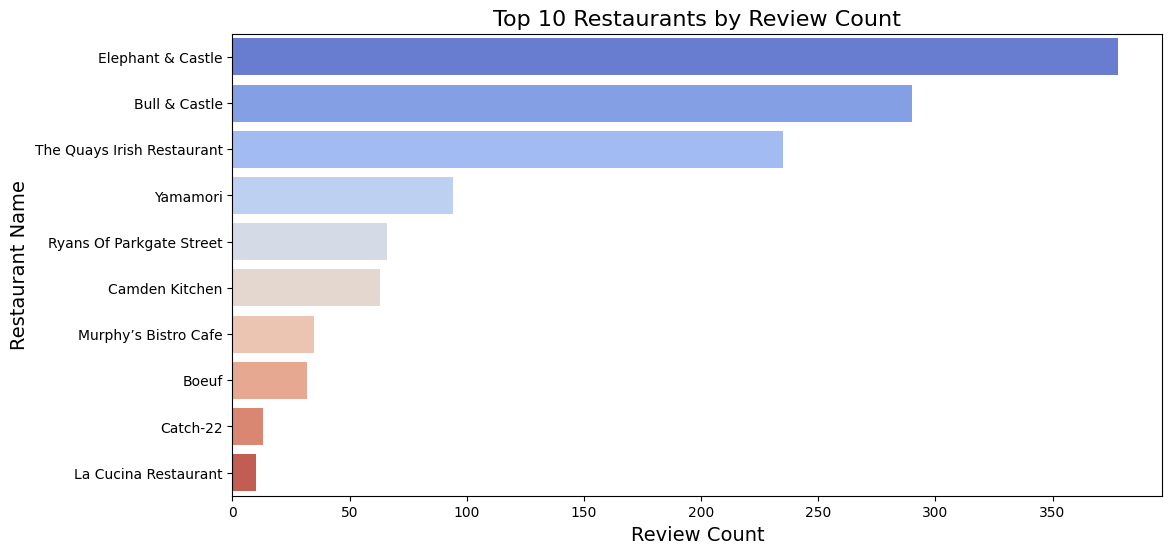

In [ ]:
# Bar Plot of Restaurants by Review Count

top_restaurants = df.nlargest(10, 'review_count')

plt.figure(figsize=(12, 6))
sns.barplot(
    x='review_count',
    y='name',
    data=top_restaurants,
    palette='coolwarm',
   # hue='name'

)
plt.title('Top 10 Restaurants by Review Count', fontsize=16)
plt.xlabel('Review Count', fontsize=14)
plt.ylabel('Restaurant Name', fontsize=14)
plt.show()


<ipython-input-17-f4b25e95a225>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating',


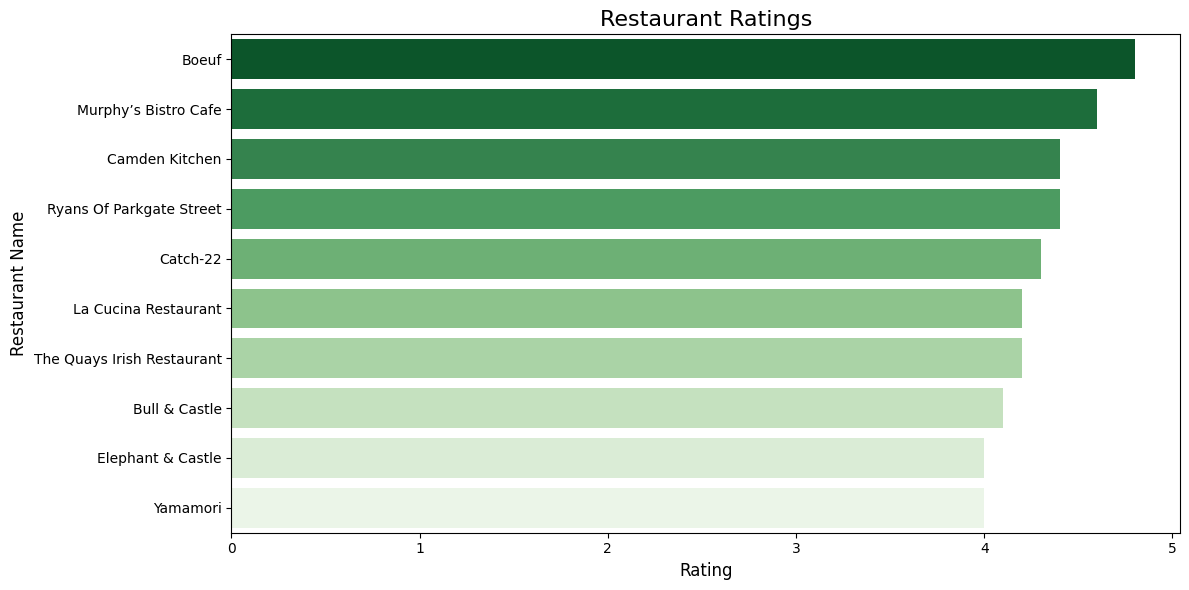

In [ ]:
# Bar Plot of Restaurants by Ratings

# Sort the data by rating
sorted_df = df.sort_values(by='rating', ascending=False)

# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a basic bar chart
sns.barplot(x='rating',
            y='name',
            #hue='name',
            data=sorted_df,
            palette='Greens_r') # Reverse the palette with _r

# Add titles and labels
plt.title('Restaurant Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
# Save to File:


#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#pd.json_normalize(business_data).to_csv('/content/drive/MyDrive/Jp_testings/output.csv', index=False)

In [ ]:
#pd.json_normalize(business_data).to_excel(r'/content/drive/MyDrive/Jp_testings/output.xlsx')

In [ ]:
#pd.json_normalize(business_data).to_json(r'/content/drive/MyDrive/Jp_testings/output.json')

In [ ]:
#pd.json_normalize(business_data).to_html(r'/content/drive/MyDrive/Jp_testings/output.html')

## **SQLite Integration**

In [ ]:
# Database Integration using SQLite database

# Import necessary libraries
import sqlite3

# Step 2: Create a connection to the SQLite database
conn = sqlite3.connect('Restaurants_data.db')

# Step 3: Write the DataFrame to the SQLite database
df.to_sql('Restaurants_stats', conn, if_exists='replace', index=False)

# Step 4: Query the database to verify data has been loaded correctly
print("Data in the 'Restaurants_stats' table:")

#Checking if the data is loaded
print(pd.read_sql('SELECT * FROM Restaurants_stats LIMIT 5;', conn))

# Step 5: Close the connection
conn.close()



Data in the 'Restaurants_stats' table:
                         name  ranking  \
0        La Cucina Restaurant       21   
1  The Quays Irish Restaurant       22   
2        Murphy’s Bistro Cafe       23   
3                       Boeuf       24   
4           Elephant & Castle       25   

                                        business_url  review_count  \
0   /biz/la-cucina-restaurant-dublin?osq=Restaurants            10   
1  /biz/the-quays-irish-restaurant-dublin-2?osq=R...           235   
2    /biz/murphys-bistro-cafe-dublin?osq=Restaurants            35   
3                  /biz/boeuf-dublin?osq=Restaurants            32   
4    /biz/elephant-and-castle-dublin?osq=Restaurants           378   

      neighborhoods          phone                                alias  \
0  South Inner City  +353-677-1221          la-cucina-restaurant-dublin   
1        Temple Bar  +353-679-1923  the-quays-irish-restaurant-dublin-2   
2  North Inner City  +353-865-6772           murphys-bistro-ca

## **UNIT TESTING**

In [ ]:
import unittest  # Importing unittest module for testing
from unittest.mock import patch, Mock  # patch to mock requests, Mock to create mock objects
import requests  # Importing requests to handle HTTP requests
import pandas as pd  # Importing pandas for DataFrame manipulation


# Yelp Data Scraper
def fetch_yelp_data(url, headers):
    response = requests.get(url, headers=headers)  # Making the GET request
    response.raise_for_status()  # Raise error if status code indicates failure
    return response.json()  # Return JSON data from response


def transform_yelp_data(data):
    main_content_list = data['searchPageProps']['mainContentComponentsListProps']  # Extracting list of businesses from data
    business_data = [
        {
            "name": item['searchResultBusiness']['name'],  # Extracting business name
            "ranking": item['searchResultBusiness'].get('ranking', 'N/A'),  # Extracting ranking, default to 'N/A' if not found
            "phone": item['searchResultBusiness'].get('phone', 'N/A'),  # Extracting phone number, default to 'N/A' if not found
            "rating": item['searchResultBusiness'].get('rating', 'N/A'),  # Extracting rating, default to 'N/A' if not found
            "neighborhoods": ", ".join(item['searchResultBusiness'].get('neighborhoods', []))  # Joining neighborhoods into a string
        }
        for item in main_content_list  # Looping over the businesses list
        if 'searchResultBusiness' in item  # Filtering only valid business items
    ]
    return pd.DataFrame(business_data)  # Returning the data as a pandas DataFrame


# Unit Tests
class TestYelpScraper(unittest.TestCase):

    @patch('requests.get')  # Mocking requests.get to avoid actual API calls
    def test_fetch_yelp_data_success(self, mock_get):
        # Mocking a successful API response with status code 200
        mock_response = Mock()
        mock_response.status_code = 200
        mock_response.json.return_value = {
            'searchPageProps': {
                'mainContentComponentsListProps': [
                    {
                        'searchResultBusiness': {
                            'name': 'Restaurant A',
                            'ranking': '1',
                            'phone': '123456789',
                            'rating': 4.5,
                            'neighborhoods': ['Dublin Center']
                        }
                    }
                ]
            }
        }
        mock_get.return_value = mock_response  # Assigning the mocked response to the request

        url = 'https://www.yelp.ie/search/snippet?find_desc=Restaurants&find_loc=Dublin&start=20'  # Test URL
        headers = {'User-Agent': 'Mozilla/5.0'}  # Test headers
        result = fetch_yelp_data(url, headers)  # Calling the function to test

        self.assertEqual(mock_response.status_code, 200)  # Verifying status code is 200
        self.assertIn('searchPageProps', result)  # Verifying the 'searchPageProps' key is in the result

    @patch('requests.get')  # Mocking requests.get to simulate a failed request
    def test_fetch_yelp_data_failure(self, mock_get):
        # Simulating an API failure with status code 500
        mock_get.return_value.status_code = 500
        mock_get.return_value.raise_for_status.side_effect = requests.exceptions.HTTPError  # Raising an HTTPError

        url = 'https://www.yelp.ie/search/snippet?find_desc=Restaurants&find_loc=Dublin&start=20'  # Test URL
        headers = {'User-Agent': 'Mozilla/5.0'}  # Test headers

        with self.assertRaises(requests.exceptions.HTTPError):  # Expecting HTTPError to be raised
            fetch_yelp_data(url, headers)

    def test_transform_yelp_data(self):
        # Mocking input data for transformation
        mock_data = {
            'searchPageProps': {
                'mainContentComponentsListProps': [
                    {
                        'searchResultBusiness': {
                            'name': 'Restaurant A',
                            'ranking': '1',
                            'phone': '123456789',
                            'rating': 4.5,
                            'neighborhoods': ['Dublin Center']
                        }
                    }
                ]
            }
        }

        df = transform_yelp_data(mock_data)  # Transforming the mock data into a DataFrame

        self.assertEqual(len(df), 1)  # Verifying that one business is in the DataFrame
        self.assertIn('name', df.columns)  # Verifying 'name' column is present
        self.assertEqual(df.loc[0, 'name'], 'Restaurant A')  # Verifying the business name is 'Restaurant A'
        self.assertIn('ranking', df.columns)  # Verifying 'ranking' column is present
        self.assertIn('phone', df.columns)  # Verifying 'phone' column is present
        self.assertIn('rating', df.columns)  # Verifying 'rating' column is present
        self.assertIn('neighborhoods', df.columns)  # Verifying 'neighborhoods' column is present
        self.assertEqual(df.loc[0, 'rating'], 4.5)  # Verifying the rating is 4.5


# Run tests
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)  # Running the tests without exiting the interpreter


...
----------------------------------------------------------------------
Ran 3 tests in 0.010s

OK
